In [1]:
# Importing libraries
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from plotnine import *


In [3]:
# I want to use the Wikipedia API to get the html for the page that lists all grandmasters
page_key = 'List_of_chess_grandmasters'
page_endpoint = 'page/' + page_key + '/html'
stem_url = 'https://en.wikipedia.org/w/rest.php/v1/'
universal_url = 'https://en.wikipedia.org/wiki/'
headers = {'User-Agent': 'Student Project'}
url = stem_url + page_endpoint

# Functions for data collection:
def get_html(url):
    '''Returns the HTML of a given URL as a BeautifulSoup object'''
    r = get(url, headers=headers)
    s = BeautifulSoup(r.text)
    return s

def get_wikitables(s):
    wikitables = s.find_all('table', class_='wikitable')
    return wikitables


wikitables = get_wikitables(get_html(url))
wikitables



[<table class="sortable wikitable mw-datatable static-row-numbers" id="grandmasters">
 <tbody id="mwHQ"><tr id="mwHg"><th id="mwHw">Name</th><th id="mwIA">FIDE ID</th><th id="mwIQ">Born</th><th id="mwIg">Birthplace</th><th id="mwIw">Died</th><th id="mwJA">Title<br id="mwJQ"/>Year</th><th id="mwJg">Federation</th><th id="mwJw"><abbr about="#mwt27" data-mw='{"parts":[{"template":{"target":{"wt":"abbr","href":"./Template:Abbr"},"params":{"1":{"wt":"Sex"},"2":{"wt":"M=male, F=female"}},"i":0}}]}' id="mwKA" title="M=male, F=female" typeof="mw:Transclusion mw:ExpandedAttrs">Sex</abbr></th><th id="mwKQ">Notes</th></tr>
 <tr about="#mwt31" data-mw="{&quot;attribs&quot;:[[{&quot;txt&quot;:&quot;&quot;,&quot;html&quot;:&quot;&lt;span class=\&quot;anchor\&quot; id=\&quot;A\&quot; about=\&quot;#mwt30\&quot; typeof=\&quot;mw:Transclusion\&quot; data-parsoid='{\&quot;stx\&quot;:\&quot;html\&quot;,\&quot;dsr\&quot;:[3695,3707,null,null],\&quot;pi\&quot;:[[{\&quot;k\&quot;:\&quot;1\&quot;}]]}' data-mw

In [7]:
rows=wikitables[0].find_all('tr')
p=[r.find_all('td')[0] for r in rows[1:]]

#a=[r.find_all('a')[0] for r in p]
a=[]
for r in p:
    try:
        a.append(r.find_all('a')[0])
    except IndexError:
        pass

links=[r.get('href') for r in a]
links=[link.replace("./", universal_url) for link in links]
links


['https://en.wikipedia.org/wiki/Jacob_Aagaard',
 'https://en.wikipedia.org/wiki/Nijat_Abasov',
 'https://en.wikipedia.org/wiki/Hasan_Abbasifar',
 'https://en.wikipedia.org/wiki/Farid_Abbasov',
 'https://en.wikipedia.org/wiki/Zhansaya_Abdumalik',
 'https://en.wikipedia.org/wiki/Nodirbek_Abdusattorov',
 'https://en.wikipedia.org/wiki/Thal_Abergel',
 'https://en.wikipedia.org/wiki/Boško_Abramović',
 'https://en.wikipedia.org/wiki/Aryam_Abreu_Delgado',
 'https://en.wikipedia.org/wiki/Péter_Ács',
 'https://en.wikipedia.org/wiki/Gergely_Aczel',
 'https://en.wikipedia.org/wiki/Michael_Adams_(chess_player)',
 'https://en.wikipedia.org/wiki/Adhiban_Baskaran',
 'https://en.wikipedia.org/wiki/Aditya_Mittal_(chess_player)?action=edit&redlink=1',
 'https://en.wikipedia.org/wiki/Al_Khatib_Ahmad?action=edit&redlink=1',
 'https://en.wikipedia.org/wiki/Ahmed_Adly',
 'https://en.wikipedia.org/wiki/András_Adorján',
 'https://en.wikipedia.org/wiki/Nikita_Afanasiev',
 'https://en.wikipedia.org/wiki/Djakhan

In [13]:
# I want to create a function that takes a link to a UK MP's Wikipedia page and returns their name, birth date, party and university
def get_info(link):
        info = {}
        page_html = get_html(link)
        page_infobox = page_html.find('table', class_='infobox')
        try: 
            info['name'] = link.split('/')[-1].replace('_', ' ')
        except: 
            info['name'] = None
        try:
            info['birth date'] = page_html.find('span', class_ = 'bday').text
        except:
            info['birth date'] = None
        return pd.DataFrame(info, index = [0])

# I want to test the function on a random MP
get_info('https://en.wikipedia.org/wiki/Jacob_Aagaard')



,name,birth date
0,Jacob Aagaard,1973-07-31


Now I can get a dataframe of all sitting MPs birth date, party, alma mater and name

In [14]:
df=pd.concat([get_info(link) for link in links])
df

,name,birth date
0,Jacob Aagaard,1973-07-31
0,Nijat Abasov,1995-05-14
0,Hasan Abbasifar,1972-08-11
0,Farid Abbasov,1979-01-31
0,Zhansaya Abdumalik,2000-01-12
...,...,...
0,Dan Zoler,1974-01-10
0,Andrey Zontakh?action=edit&redlink=1,None
0,Alexander Zubarev,1979-12-17
0,Oleksandr Zubov?action=edit&redlink=1,None


In [15]:
df.to_csv('../data/chess_gms.csv', index=False)

# Part 2

In [11]:
import pandas as pd
df=pd.read_csv('../data/chess_gms.csv')
df['birth date'] = pd.to_datetime(df['birth date'])
df

,name,birth date
0,Jacob Aagaard,1973-07-31
1,Nijat Abasov,1995-05-14
2,Hasan Abbasifar,1972-08-11
3,Farid Abbasov,1979-01-31
4,Zhansaya Abdumalik,2000-01-12
...,...,...
2021,Dan Zoler,1974-01-10
2022,Andrey Zontakh?action=edit&redlink=1,NaT
2023,Alexander Zubarev,1979-12-17
2024,Oleksandr Zubov?action=edit&redlink=1,NaT


In [12]:
# Add zodiac
def get_zodiac_sign(date):
    month = date.month
    day = date.day

    if (month == 1 and day >= 20) or (month == 2 and day <= 18):
        return "Aquarius"
    elif (month == 2 and day >= 19) or (month == 3 and day <= 20):
        return "Pisces"
    elif (month == 3 and day >= 21) or (month == 4 and day <= 19):
        return "Aries"
    elif (month == 4 and day >= 20) or (month == 5 and day <= 20):
        return "Taurus"
    elif (month == 5 and day >= 21) or (month == 6 and day <= 20):
        return "Gemini"
    elif (month == 6 and day >= 21) or (month == 7 and day <= 22):
        return "Cancer"
    elif (month == 7 and day >= 23) or (month == 8 and day <= 22):
        return "Leo"
    elif (month == 8 and day >= 23) or (month == 9 and day <= 22):
        return "Virgo"
    elif (month == 9 and day >= 23) or (month == 10 and day <= 22):
        return "Libra"
    elif (month == 10 and day >= 23) or (month == 11 and day <= 21):
        return "Scorpio"
    elif (month == 11 and day >= 22) or (month == 12 and day <= 21):
        return "Sagittarius"
    elif (month == 12 and day>=22) or (month == 1 and day <=19):
        return "Capricorn"
    else:
        return None
    
df['zodiac'] = df['birth date'].apply(get_zodiac_sign)
df

,name,birth date,zodiac
0,Jacob Aagaard,1973-07-31,Leo
1,Nijat Abasov,1995-05-14,Taurus
2,Hasan Abbasifar,1972-08-11,Leo
3,Farid Abbasov,1979-01-31,Aquarius
4,Zhansaya Abdumalik,2000-01-12,Capricorn
...,...,...,...
2021,Dan Zoler,1974-01-10,Capricorn
2022,Andrey Zontakh?action=edit&redlink=1,NaT,None
2023,Alexander Zubarev,1979-12-17,Sagittarius
2024,Oleksandr Zubov?action=edit&redlink=1,NaT,None


## Analysis

In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        2026 non-null   object        
 1   birth date  1308 non-null   datetime64[ns]
 2   zodiac      1308 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 47.6+ KB


C:\Users\Ojas\AppData\Local\Temp\ipykernel_31204\1496789506.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,name,birth date,zodiac
count,2026,1308,1308
unique,2026,1268,12
top,Jacob Aagaard,1967-01-21 00:00:00,Aquarius
freq,1,3,138
first,NaN,1865-02-27 00:00:00,NaN
last,NaN,2009-02-05 00:00:00,NaN


<AxesSubplot:>

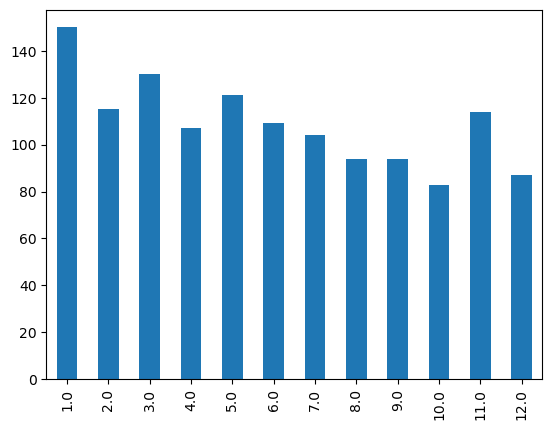

In [14]:
df['birth date'].dt.month.value_counts().sort_index().plot(kind='bar')

In [15]:
from UN_monthly_births import births_df
births_df.drop(columns=['births_count'], inplace=True)
births_df

,births_percentage
Jan,8.73
Feb,7.75
Mar,8.29
Apr,7.95
May,8.22
Jun,8.12
Jul,8.65
Aug,8.72
Sep,8.74
Oct,8.58


In [16]:
monthly_data=df.groupby(df['birth date'].dt.month).count()[['name']]
monthly_data.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_data['gm_percentage']=(monthly_data['name']/monthly_data['name'].sum()*100).round(2)
monthly_data.rename(columns={'name':'gm_count'},inplace=True)
monthly_data=monthly_data.merge(births_df, left_index=True, right_index=True)
monthly_data['pc_diff']=((monthly_data['gm_percentage']-monthly_data['births_percentage'])*100/monthly_data['births_percentage']).round(2)
monthly_data.index=pd.Categorical(monthly_data.index, categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
monthly_data

,gm_count,gm_percentage,births_percentage,pc_diff
Jan,150,11.47,8.73,31.39
Feb,115,8.79,7.75,13.42
Mar,130,9.94,8.29,19.90
Apr,107,8.18,7.95,2.89
May,121,9.25,8.22,12.53
Jun,109,8.33,8.12,2.59
Jul,104,7.95,8.65,-8.09
Aug,94,7.19,8.72,-17.55
Sep,94,7.19,8.74,-17.73
Oct,83,6.35,8.58,-25.99


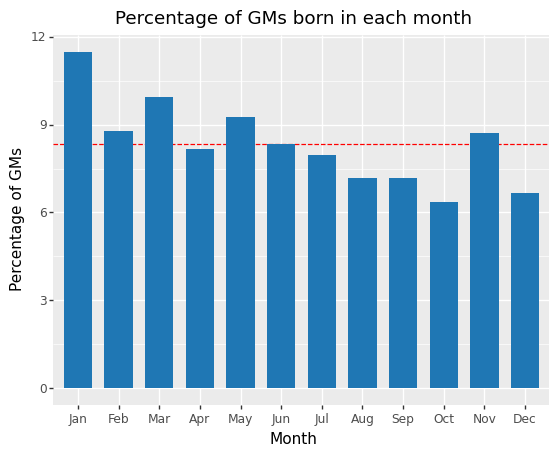

<ggplot: (133607198305)>

In [17]:
# Percentage of GMs born in each month plot
from plotnine import *
(ggplot(monthly_data, aes(x=monthly_data.index, y='gm_percentage')) 
 + geom_hline(yintercept=8.33, linetype='dashed', color='red')
 + geom_bar(stat='identity', fill='#1f77b4', width=0.7)
 + labs(x='Month', y='Percentage of GMs', title='Percentage of GMs born in each month')
)

In [ ]:
'''
Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.38621    0.58122  17.870 6.43e-09 ***
month       -0.31570    0.07897  -3.998  0.00253 ** 
---
Residual standard error: 0.9444 on 10 degrees of freedom
Multiple R-squared:  0.6151,	Adjusted R-squared:  0.5766 
F-statistic: 15.98 on 1 and 10 DF,  p-value: 0.002528
'''

<AxesSubplot:>

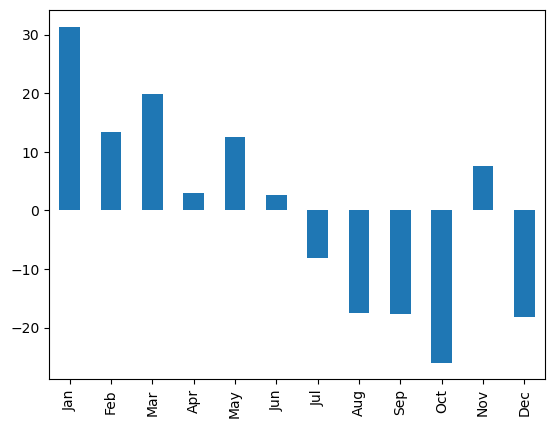

In [18]:
# Percentage difference plot
monthly_data['pc_diff'].plot(kind='bar')

In [ ]:
'''
Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  25.7652     6.9520   3.706  0.00407 **
month        -3.9295     0.9446  -4.160  0.00195 **
---

Residual standard error: 11.3 on 10 degrees of freedom
Multiple R-squared:  0.6338,	Adjusted R-squared:  0.5972 
F-statistic: 17.31 on 1 and 10 DF,  p-value: 0.001949
'''
# Regression results

In [19]:
# ZODIAC ANALYSIS
zodiac_data=df.groupby('zodiac').count()[['name']]
zodiac_data.rename(columns={'name':'count'},inplace=True)
zodiac_data['percentage']=(zodiac_data['count']/zodiac_data['count'].sum()*100).round(2)
zodiac_data

,count,percentage
zodiac,,
Aquarius,138,10.55
Aries,118,9.02
Cancer,119,9.10
Capricorn,114,8.72
Gemini,108,8.26
Leo,99,7.57
Libra,90,6.88
Pisces,121,9.25
Sagittarius,108,8.26


<AxesSubplot:xlabel='zodiac'>

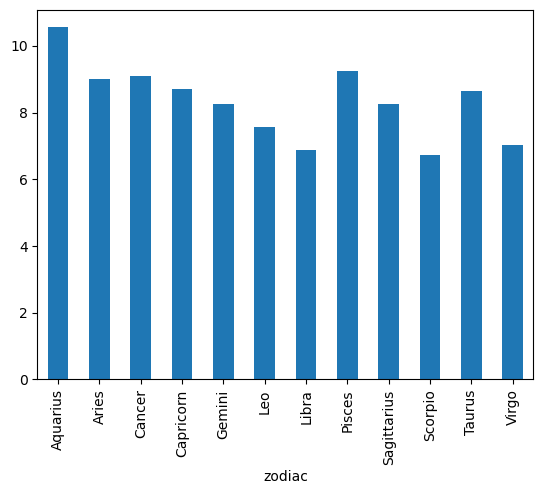

In [20]:
# Zodiac plot
zodiac_data['percentage'].plot(kind='bar')